# Python Programming

## 1. Introduction to Python

- Scalar variables: `data type`, `numbers`, `strings`, *etc.*
- Collections: `list`, `tuple`, `dictionary`, `set`, *etc.*
- Control structures: `if-elif-else`, `for` loop, `while` loop, *etc.*
- Functions: build-in functions, self-defined functions, modules, library, *etc.*
- Class: definition, object, encapsulation, inheritance, polymorphism, *etc.*

## 2. Numpy, Pandas, Matplotlib

In [12]:
# Code for display_timings()

import matplotlib.pyplot as plt


def display_timings(**kwargs):
    nrows = len(kwargs)
    fig, ax = plt.subplots(figsize=(8,min(nrows,8)))
    keys = list(kwargs)
    fmt_keys = [k.replace('_', ' ') for k in kwargs]
    i_keys = list(range(len(keys)))
    
    ax.barh(i_keys, times := [kwargs[key].average for key in keys])
    ax.errorbar(times, i_keys, xerr=[kwargs[key].stdev for key in keys], fmt='ro')
    ax.set(xscale="log", xlabel="avg. wall time (seconds)")
    axis = plt.gca()
    axis.set_yticks(i_keys, fmt_keys)

### 2.1 Numpy

:::{important}`NumPy` is a Python library for arrays
It can be used to perform a wide variety of (efficient) mathematical operations and linear algebra on arrays and matrices.
:::

In [22]:
a = list(range(10000))
b = [0] * 10000

Why should use **loops**...

In [33]:
%%timeit -q -o
for i in range(len(a)):
    b[i] = a[i] ** 2

<TimeitResult : 1.65 ms ± 6.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [34]:
time_loops = _

In [35]:
import numpy as np

a = np.arange(10000)
b = np.zeros(10000)

... when you can **vectorize**!

In [36]:
%%timeit -q -o
b = a**2

<TimeitResult : 2.5 μs ± 2.96 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)>

In [37]:
time_vec = _

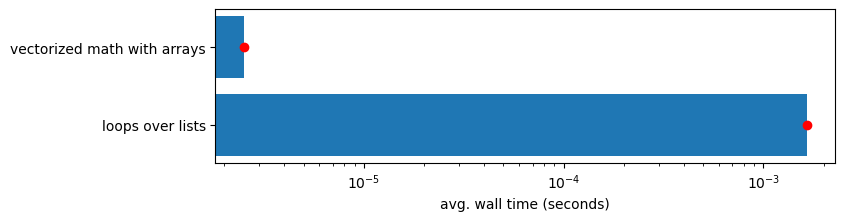

In [40]:
display_timings(loops_over_lists=time_loops, vectorized_math_with_arrays=time_vec)

:::{note}
Numpy is often imported as `np` and this is common convention.
:::

#### Creating arrays

Python sequences such as lists or tuples can be **transformed** into a Numpy array.

Numpy arrays can be **1D, 2D, .... n-dimensional**.

In [11]:
a = np.array([1, 2, 3])  # 1-dimensional array (rank 1)
b = np.array([[1, 2, 3], [4, 5, 6]])  # 2-dimensional array (rank 2)

print(b.shape)  # the shape (rows,columns)
print(b.size)  # number of elements

(2, 3)
6


It is often **homogenous**, that is made of a single data type

In [14]:
a.dtype

dtype('int64')

Arrays can also be **generated**.

In [43]:
np.eye(3)  # Identity "matrix"

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [41]:
a = np.arange(16)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [45]:
a = a.reshape(4, 4)

b = np.random.rand(16).reshape(4, 4)
b

array([[0.91116958, 0.02476125, 0.12801883, 0.78980793],
       [0.03393289, 0.62914123, 0.86045695, 0.73197741],
       [0.11529067, 0.02787714, 0.74683386, 0.97903289],
       [0.62962796, 0.82815469, 0.24121746, 0.20290529]])

#### Array maths and vectorization

In [46]:
c = np.add(a, b)  # equivalent to `a + b`
c

array([[ 0.91116958,  1.02476125,  2.12801883,  3.78980793],
       [ 4.03393289,  5.62914123,  6.86045695,  7.73197741],
       [ 8.11529067,  9.02787714, 10.74683386, 11.97903289],
       [12.62962796, 13.82815469, 14.24121746, 15.20290529]])

Other common mathematical operations include:
- elementwise operations:
    - `-` (numpy.subtract)
    - `*` (numpy.multiply)
    - `/` (numpy.divide)
    - `**` (numpy.pow())
- `.T` (numpy.transpose())
- `np.sqrt()`, `np.sum()`, `np.mean()`, `np.std()`, `np.max()`, `np.min()`
- `@` (np.dot() / np.matmul())

In [47]:
# Matrix multiplication
a * b

array([[ 0.        ,  0.02476125,  0.25603766,  2.36942379],
       [ 0.13573157,  3.14570616,  5.16274168,  5.12384185],
       [ 0.92232536,  0.25089424,  7.46833858, 10.76936177],
       [ 7.55553557, 10.76601098,  3.37704442,  3.04357936]])

In [48]:
np.dot(a, b)  # equals to `a @ b`

array([[ 2.15339812,  3.16935958,  3.07777704,  3.29875906],
       [ 8.91348256,  9.20909683, 10.98388541, 14.11365313],
       [15.67356699, 15.24883408, 18.88999378, 24.9285472 ],
       [22.43365142, 21.28857133, 26.79610216, 35.74344127]])

In [50]:
np.matmul(a, b)

array([[ 2.15339812,  3.16935958,  3.07777704,  3.29875906],
       [ 8.91348256,  9.20909683, 10.98388541, 14.11365313],
       [15.67356699, 15.24883408, 18.88999378, 24.9285472 ],
       [22.43365142, 21.28857133, 26.79610216, 35.74344127]])

### 2.2 Pandas

:::{important}`Pandas` is for tabular data

It is provides intuitive data structures for functions for reading in, manipulating and
performing high-performance data analysis of tabular data.
:::

#### Code example to analyze the Titanic passenger data

In [52]:
import pandas as pd

url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic = pd.read_csv(url, index_col="Name")

In [53]:
titanic.shape

(891, 11)

Tabular data can be **heterogenous**.

In [54]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
# print the first 5 lines of the dataframe

titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# print summary statistics for each column

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
titanic.groupby("Survived")["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

### 2.3 Matplotlib

`Matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python.

#### Visualization of the Titanic passenger data

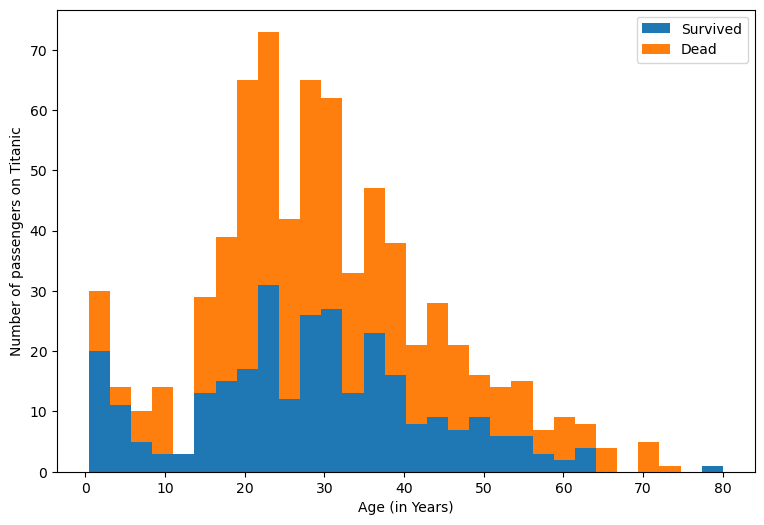

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.hist(
    [
        titanic[titanic["Survived"] == 1]["Age"],
        titanic[titanic["Survived"] == 0]["Age"],
    ],
    stacked=True,
    bins=30,
    label=["Survived", "Dead"],
)
plt.xlabel("Age (in Years)")
plt.ylabel("Number of passengers on Titanic")
plt.legend()

# GPU Programming using Python

There are several options available to work with python for GPU programming.
- [GPU Programming: When, Why and How?](https://enccs.github.io/gpu-programming/)
- [GPU Programming (Carpentries)](https://arc.leeds.ac.uk/lesson-gpu-programming/)

## 1. **`cuDF`** and **`cuML`** libraries in ![RAPIDS](img/RAPIDS-logo.png)

:::{important} [RAPIDS](https://rapids.ai/) is a high-level package collection

It implements CUDA functionalities and API with Python bindings.

**It only supports NVIDIA GPUs.**

- **`cuDF`** is the dataframe library for manipulating tabular datasets using GPU. cuDF provides a **Pandas**-like API for loading, joining, aggregating, filtering, and manipulating data.
- **`cuML`** is a suite of libraries that implement algorithms and mathematical primitives functions to train machine learning models on your data to make predictions, similar to the **`scikit-learn`** API.

:::

## 2. Numba

:::{important} `Numba` is an open-source just-in-time (JIT) compiler

- It translates a subset of Python and NumPy into fast machine code using LLVM.
- `Numba` offers options for parallelising Python code for CPUs and GPUs, with minor code changes.
:::

### 2.1 `numba.jit()` decorator

Numba provides several utilities for code generation, and its central feature is the `numba.jit()` decorator.

In [26]:
import numpy as np

mx = np.arange(10000).reshape(100, 100)


def go_slow(a):  # Function is compiled and runs in machine code
    result = 0.0
    for i in range(a.shape[0]):
        result += np.sin(a[i, i])
    return result


time_slow = %timeit -o go_slow(mx)

72.1 μs ± 645 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [27]:
from numba import jit


@jit(nopython=True)
def go_fast(a):
    result = 0.0
    for i in range(a.shape[0]):
        result += np.sin(a[i, i])
    return result


time_fast = %timeit -o go_fast(mx)

1.93 μs ± 1.61 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


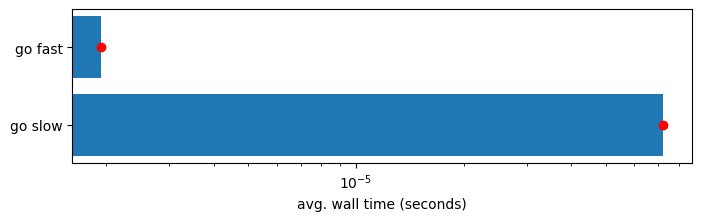

In [28]:
display_timings(go_slow=time_slow, go_fast=time_fast)

### 2.2 `ufunc` and `gufunc`

Another feature of Numba is to generate NumPy universal functions.

There are two types of universal functions:
- Those which operate on scalars are “universal functions” (`ufunc`), which are achieved via `@vectorize` decorator
- Those which operate on higher dimensional arrays and scalars are “generalized universal functions” (`gufunc`), which are achived via `@guvectorize` decorator

In [1]:
import math
import numpy as np
import numba


# a simple version without using numba
def func_cpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)


@np.vectorize(otypes=[float])
def func_numpy_cpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)

# def func_numpy(x, y):
#     return np.pow(x, 3.0) + 4 * np.sin(y)


@numba.vectorize([numba.float64(numba.float64, numba.float64)], target="cpu")
def func_numba_cpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)


@numba.vectorize([numba.float64(numba.float64, numba.float64)], target="cuda")
def func_numba_gpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)

:::{note}
The commented-out variant `func_numpy` which uses numpy functions (`np.pow` and `np.sin`) would automatically vectorize and perform little better than the first two -  making it a better formulation for the purpose. 
**We don't do that here to illustrate vectorized functions which may be required for custom algorithms**.
:::

In [2]:
N = 10000000
mx = np.random.rand(N)
result = np.empty_like(mx)

In [3]:
%%timeit -r 1 -q -o
for i in range(N):
    result[i] = func_cpu(mx[i], mx[i])

<TimeitResult : 3.12 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [4]:
time_cpu = _

In [5]:
%timeit -q -o result_numpy_cpu = func_numpy_cpu(mx, mx)

<TimeitResult : 2.25 s ± 67.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [6]:
time_numpy_cpu = _

In [7]:
%timeit -q -o result_numba_cpu = func_numba_cpu(mx, mx)

<TimeitResult : 172 ms ± 2.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [8]:
time_numba_cpu = _

In [9]:
%timeit -q -o result = func_numba_gpu(mx, mx)

<TimeitResult : 75.2 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [10]:
time_numba_gpu = _

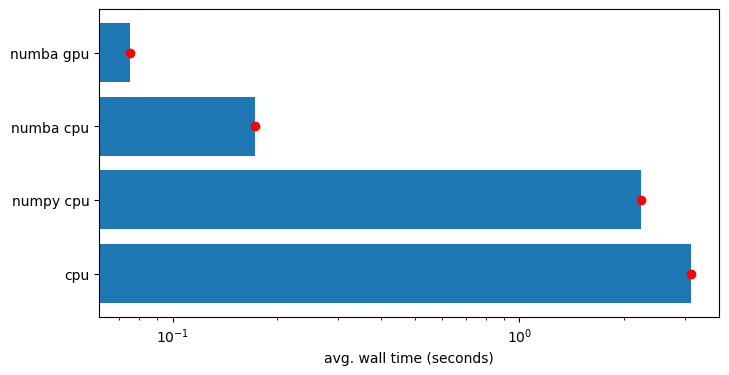

In [13]:
display_timings(
    cpu=time_cpu,
    numpy_cpu=time_numpy_cpu,
    numba_cpu=time_numba_cpu,
    numba_gpu=time_numba_gpu
)

:::{note}
- Using `ufunc` (or `gufunc`) for GPU programming may not always yield optimal performance due to automatic handling of data transfer and kernel launching.
- In practical applications, not every function can be constructed as a `ufunc`.
:::

### 2.3 An example for vector addition with manual data transfer

Sometimes, for better performance, one need to calibrate kernels and manually manage data transfer.

In [14]:
import numpy as np
import numba


@numba.cuda.jit
def func(a, b, c):
    """GPU vectorized addition. Computes C = A + B"""
    # like threadIdx.x + (blockIdx.x * blockDim.x)
    thread_id = numba.cuda.grid(ndim=1)
    size = len(c)

    if thread_id < size:
        c[thread_id] = a[thread_id] + b[thread_id]

Below, we explicitly move two arrays to the device memory.

In [15]:
N = 10000000
a = numba.cuda.to_device(np.random.random(N))
b = numba.cuda.to_device(np.random.random(N))
c = numba.cuda.device_array_like(a)

In [18]:
type(a)

numba.cuda.cudadrv.devicearray.DeviceNDArray

In [16]:
%timeit func.forall(len(a))(a, b, c)
print(c.copy_to_host())

2.64 ms ± 108 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
[0.90434678 1.16153343 0.89769033 ... 0.55793435 0.73256657 1.39332158]


In [27]:
nthreads = 256  # Enough threads per block for several warps per block
nblocks = (len(a) // nthreads) + 1  # Enough blocks to cover entire vector

%timeit func[nblocks, nthreads](a, b, c)
print(c.copy_to_host())

2.64 ms ± 68.1 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
[0.78838358 1.21154319 1.41323361 ... 0.90729069 1.02219255 1.32124254]


## 3. Jax

:::{important} `Jax` offers a drop-in import alias for Numpy and JIT compiler

Although `Jax` was originally designed to build neural networks with built-in support for auto-differentiation, it
can also be used to optimize other generic computation loads.

- Like, CuPy (coming soon), using `import jax.numpy as jnp` provides access to a large subset of optimized Numpy functions.
- Like Numba, we decorate with `@jax.jit` to JIT compile. Compiled function can run in GPU (CUDA and experimental ROCm support), TPU or CPU opportunistically.
- Unlike Numba, Jax can only work with certain kinds of code: [pure functions, for-loops written differently, etc.](https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html).


:::

### 3.1 Jax as NumPy

In [37]:
import numpy as np

data = np.random.random((10, 10_000))
data[5, 42] = np.nan
data[7, 1111] = np.nan

In [38]:
# compute 90th percentile ignoring NaNs, and along the rows of an array
time_numpy = %timeit -o np.nanpercentile(data, 90, axis=0)

291 ms ± 2.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
import jax.numpy as jnp

time_jax = %timeit -o jnp.nanpercentile(data, 90, axis=0)

4.2 ms ± 64.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


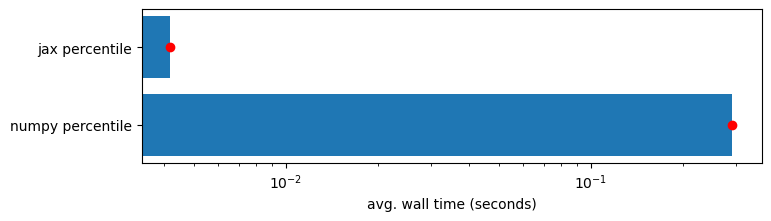

In [40]:
display_timings(numpy_percentile=time_numpy, jax_percentile=time_jax)

### 3.2 Jax as JIT compiler

Here we will revisit the example function shown in [section 2.2](#id-2-2-ufunc-and-gufunc).

In [50]:
import numpy as np
import jax.numpy as jnp
from jax import jit


def func_numpy(x, y):
    return np.power(x, 3.0) + 4 * np.sin(y)


@jit
def func_jax(x, y):
    return jnp.power(x, 3.0) + 4 * jnp.sin(y)

In [51]:
N = 10000000
mx = np.random.rand(N)

In [52]:
time_numpy = %timeit -o func_numpy(mx, mx)

195 ms ± 5.63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
time_jax = %timeit -o func_jax(mx, mx)

43.8 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
import jax
jax.devices()

[CpuDevice(id=0)]

In [60]:
dmx = jax.device_put(mx)
dmx.devices()

{CpuDevice(id=0)}

In [63]:
time_jax_gpu = %timeit -o func_jax(dmx, dmx)

25.3 ms ± 711 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


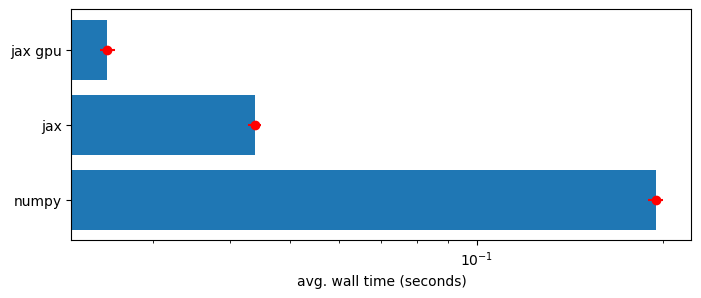

In [64]:
display_timings(numpy=time_numpy, jax=time_jax, jax_gpu=time_jax_gpu)

## 4. CuPy

:::{important} `CuPy` is a NumPy/SciPy-compatible array library for GPU-accelerated computing with Python. 
- It has been developed for NVIDIA GPUs but has experimental support both NVIDIA and AMD GPUs.
- All you need to do is replace `numpy` and `scipy` with `cupy` and `cupyx.scipy` in your Python code.
:::

:::{seealso}
Tutorials:
- https://docs.cupy.dev/en/stable/user_guide/basic.html
- https://arc.leeds.ac.uk/lesson-gpu-programming/02-cupy/index.html
- https://carpentries-incubator.github.io/lesson-gpu-programming/cupy.html
:::

**Replacement of numpy with cupy**

In [28]:
import cupy as cp
import numpy as np

lst = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# creating arrays
lst_cpu = np.array(lst)
lst_gpu = cp.array(lst)

# calculate the Euclidean norm
lst_cpu_norm = np.linalg.norm(lst_cpu)
lst_gpu_norm = cp.linalg.norm(lst_gpu)

print("Using Numpy: ", lst_cpu_norm)
print("Using Cupy:  ", lst_gpu_norm)

Using Numpy:  16.881943016134134
Using Cupy:   16.881943016134134


**Speed comparison between cupy and numpy**

In [29]:
# speed comparison between cupy and numpy

import time

# NumPy and CPU Runtime
start = time.time()
x_cpu = np.random.random((10000, 10000))
end = time.time()
print("Time consumed by numpy: ", end - start)

# CuPy and GPU Runtime
start = time.time()
x_gpu = cp.random.random((10000, 10000))
end = time.time()
print("Time consumed by cupy : ", end - start)

Time consumed by numpy:  0.4509103298187256
Time consumed by cupy :  0.03249478340148926


**Interfacing with user-defined Kernels**

In [30]:
import cupy as cp

add_kernel = cp.RawKernel(
    r"""
extern "C" __global__
void my_add(const float* x1, const float* x2, float* y) {
    int tid = blockDim.x * blockIdx.x + threadIdx.x;
    y[tid] = x1[tid] + x2[tid];
}
""",
    "my_add",
)

x1 = cp.arange(25, dtype=cp.float32).reshape(5, 5)
x2 = cp.arange(25, dtype=cp.float32).reshape(5, 5)

x2

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]], dtype=float32)

In [31]:
y = cp.zeros((5, 5), dtype=cp.float32)
y

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
add_kernel((5,), (5,), (x1, x2, y))  # grid, block and arguments

y

array([[ 0.,  2.,  4.,  6.,  8.],
       [10., 12., 14., 16., 18.],
       [20., 22., 24., 26., 28.],
       [30., 32., 34., 36., 38.],
       [40., 42., 44., 46., 48.]], dtype=float32)

## 5. PyCUDA

:::{important} [PyCUDA](https://pypi.org/project/pycuda/) is a Python programming environment for CUDA
- It allows users to access to NVIDIA’s CUDA parallel computing API from Python.
- PyCUDA is powerful library but only runs on NVIDIA GPUs.
- Knowledge of CUDA programming is needed.
:::

In [33]:
# Step 1: Initialization

import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

In [34]:
# Step 2: Transferring data

# 2.1: Generating numbers with single precision
import numpy as np

mx_cpu = np.random.randn(4, 4)
mx_cpu = mx_cpu.astype(np.float32)
print(mx_cpu, end="\n")

# 2.2: Allocation of memory on GPU
mx_gpu = cuda.mem_alloc(mx_cpu.nbytes)

# 2.3: Transferring data from CPU (host) to GPU (device)
cuda.memcpy_htod(mx_gpu, mx_cpu)

[[-1.4692543  -1.4006982  -0.9751594   0.17828342]
 [-0.47099897  0.4299076   1.0345104   1.214283  ]
 [-0.09249809 -0.8394253   0.5509558  -1.2789341 ]
 [-0.5057602   1.00467    -1.0094197   1.4986904 ]]


In [35]:
# Step 3: Executing a kernel on GPU

# 3.1 Definition of the kernel
mod = SourceModule(
    """
  __global__ void doublify(float *a)
  {
    int idx = threadIdx.x + threadIdx.y*4;
    a[idx] *= 2.0;
  }
  """
)

# 3.2 Compile this kernel, loading it onto GPU, and then call this kernel
func = mod.get_function("doublify")

func(mx_gpu, block=(4, 4, 1), grid=(1, 1))

In [36]:
# Step 4: Transferring data from GPU (device) to CPU (host)

mx_doubled = np.empty_like(mx_cpu)
cuda.memcpy_dtoh(mx_doubled, mx_gpu)

print(mx_cpu, "\n\n", mx_doubled)

[[-1.4692543  -1.4006982  -0.9751594   0.17828342]
 [-0.47099897  0.4299076   1.0345104   1.214283  ]
 [-0.09249809 -0.8394253   0.5509558  -1.2789341 ]
 [-0.5057602   1.00467    -1.0094197   1.4986904 ]] 

 [[-2.9385085  -2.8013964  -1.9503188   0.35656685]
 [-0.94199795  0.8598152   2.0690207   2.428566  ]
 [-0.18499617 -1.6788507   1.1019115  -2.5578682 ]
 [-1.0115204   2.00934    -2.0188394   2.9973807 ]]


In [37]:
# Bonus: Abstracting Away the Complications
# Using a pycuda.gpuarray to achieve the same effect with less writing

import pycuda.gpuarray as gpuarray

mx_gpu = gpuarray.to_gpu(np.random.randn(4, 4).astype(np.float32))
mx_doubled = (2 * mx_gpu).get()

print(mx_gpu, "\n\n", mx_doubled)

[[ 0.10586049 -2.3922634  -0.2553264  -0.9660976 ]
 [-1.2670941  -0.37932327  0.8783075   0.43634078]
 [ 1.6506102  -0.5951775   0.76673955  1.4514925 ]
 [ 2.2399697   0.7734547   0.2173751   2.7589269 ]] 

 [[ 0.21172097 -4.784527   -0.5106528  -1.9321952 ]
 [-2.5341883  -0.75864655  1.756615    0.87268156]
 [ 3.3012204  -1.190355    1.5334791   2.902985  ]
 [ 4.4799395   1.5469095   0.4347502   5.5178537 ]]
